<a href="https://colab.research.google.com/github/abhhiixxhek/Stock-Analysis-and-Prediction/blob/main/Stock_Market_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Stock Market Analysis and Prediction

## Stock Market Data From Yahoo Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Yahoo Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Predicted future stock prices through a Monte Carlo method!
   

In [61]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [62]:
# For reading stock data from yahoo
from pandas_datareader import DataReader
# For time stamps
from datetime import datetime
# For division
from __future__ import division

#### Section 1 - Basic Analysis of Stock Information


In [63]:
import yfinance as yf
from datetime import datetime

# List of Tech_stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# For-loop for grabbing Yahoo Finance data and setting as a DataFrame
# Set DataFrame as the Stock Ticker
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [64]:
AAPL.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-11-27 00:00:00+00:00,188.864731,189.789993,190.669998,188.899994,189.919998,40552600
2023-11-28 00:00:00+00:00,189.471756,190.399994,191.080002,189.399994,189.779999,38415400
2023-11-29 00:00:00+00:00,188.446793,189.369995,192.089996,188.970001,190.899994,43014200
2023-11-30 00:00:00+00:00,189.023956,189.949997,190.320007,188.190002,189.839996,48794400
2023-12-01 00:00:00+00:00,190.307693,191.240005,191.559998,189.229996,190.330002,45679300


In [65]:
# Summery stats for Apple Stock
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,201.406853,201.934661,203.611116,200.050120,201.783267,5.758394e+07
std,22.082003,21.904717,22.087378,21.542151,21.856045,3.037993e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.811130e+07
25%,183.418907,184.199997,185.119995,182.180000,183.735001,4.216965e+07
50%,194.041672,194.830002,196.630005,193.830002,195.220001,5.019060e+07
75%,224.229996,224.269997,226.260002,222.719994,224.525002,6.394325e+07
max,236.220108,236.479996,237.490005,234.449997,236.479996,3.186799e+08


In [66]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-11-27 00:00:00+00:00 to 2024-11-22 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  251 non-null    float64
 1   (Close, AAPL)      251 non-null    float64
 2   (High, AAPL)       251 non-null    float64
 3   (Low, AAPL)        251 non-null    float64
 4   (Open, AAPL)       251 non-null    float64
 5   (Volume, AAPL)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

<Figure size 1000x600 with 0 Axes>

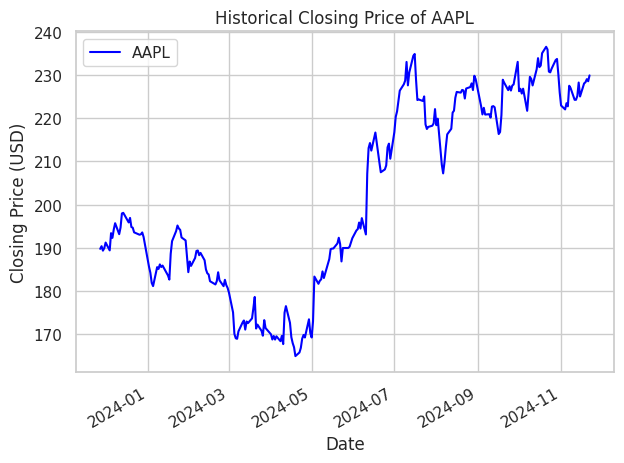

In [67]:
import matplotlib.pyplot as plt

# Plotting the historical closing price of AAPL
plt.figure(figsize=(10, 6))
AAPL['Close'].plot(color='blue', linestyle='-', linewidth=1.5, label='AAPL Closing Price')
plt.title('Historical Closing Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

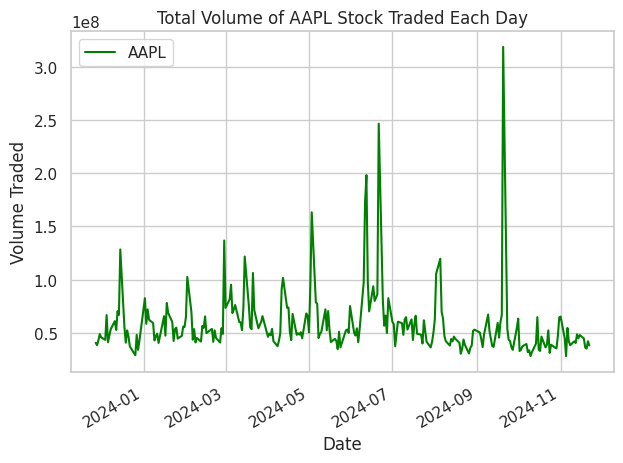

In [68]:
import matplotlib.pyplot as plt

# Plotting the total volume of AAPL stock being traded each day
plt.figure(figsize=(10, 6))
AAPL['Volume'].plot(color='green', linestyle='-', linewidth=1.5, label='AAPL Volume Traded')
plt.title('Total Volume of AAPL Stock Traded Each Day')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


We can see that on Oct'2024 was the higher for AAPL stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock.
Let's go ahead and caculate the moving average for the AAPL stock.


In [69]:
# Pandas has a built-in rolling mean calculator
# Let's go ahead and plot out several moving averages
MA_day = [10, 20, 50, 100]
for ma in MA_day:
    column_name = 'MA for %s days' % ma
    AAPL[column_name] = AAPL['Close'].rolling(window=ma).mean()


Now, lets plot all the additional Moving Averages for AAPL stock

<Figure size 1200x800 with 0 Axes>

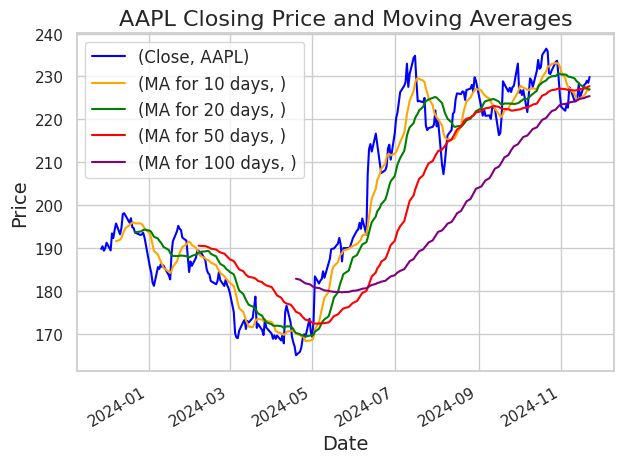

In [70]:
# Plotting the closing price and moving averages
plt.figure(figsize=(12, 8))  # Larger figure size for better clarity
AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(
    color=['blue', 'orange', 'green', 'red', 'purple'], linewidth=1.5)
plt.title('AAPL Closing Price and Moving Averages', fontsize=16)  # Increase title font size
plt.xlabel('Date', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Price', fontsize=14)  # Increase y-axis label font size
plt.grid(True)
plt.legend(loc='upper left', fontsize=12)  # Increase legend font size
plt.tight_layout()
plt.show()


#### Section 2 - Daily Return Analysis


Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock.


In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.


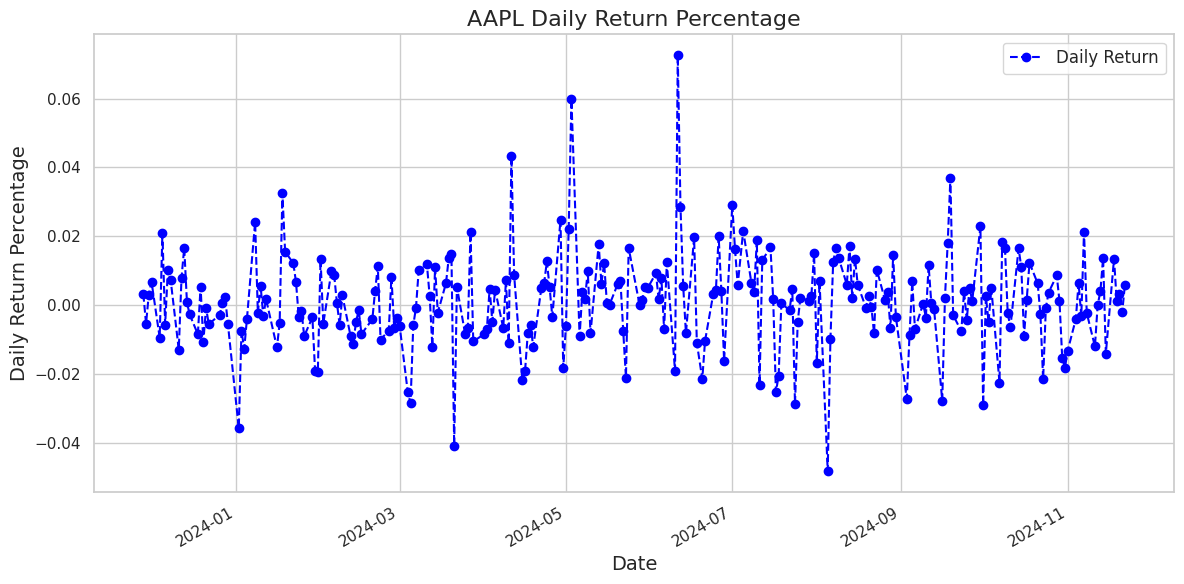

In [71]:
# Calculate the daily return percentage
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Plotting the daily return percentage
plt.figure(figsize=(12, 6))  # Adjusting figure size for better clarity
AAPL['Daily Return'].plot(color='blue', linestyle='--', marker='o', linewidth=1.5, label='Daily Return')
plt.title('AAPL Daily Return Percentage', fontsize=16)  # Increase title font size
plt.xlabel('Date', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Daily Return Percentage', fontsize=14)  # Increase y-axis label font size
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)  # Increase legend font size and position
plt.tight_layout()
plt.show()

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

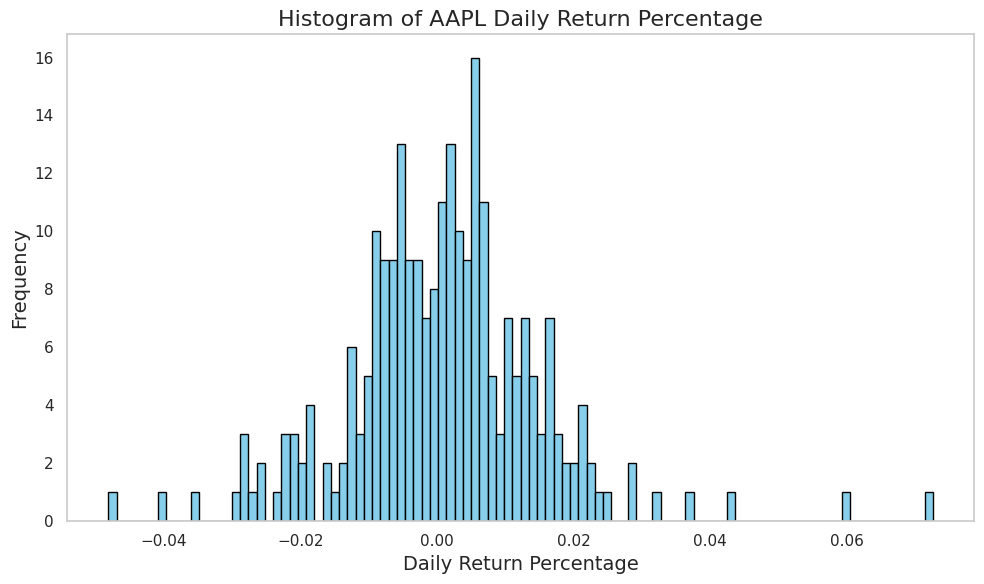

In [72]:
# Plotting the histogram of daily return percentage
plt.figure(figsize=(10, 6))  # Adjusting figure size for better clarity
AAPL['Daily Return'].hist(bins=100, color='skyblue', edgecolor='black')  # Adjusting color and edgecolor
plt.title('Histogram of AAPL Daily Return Percentage', fontsize=16)  # Increase title font size
plt.xlabel('Daily Return Percentage', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Frequency', fontsize=14)  # Increase y-axis label font size
plt.grid(False)  # Turning off grid lines for better clarity
plt.tight_layout()
plt.show()


<ipython-input-73-ea3067463f41>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta', hist_kws={'edgecolor': 'black'})  # Adjusting color and edgecolor


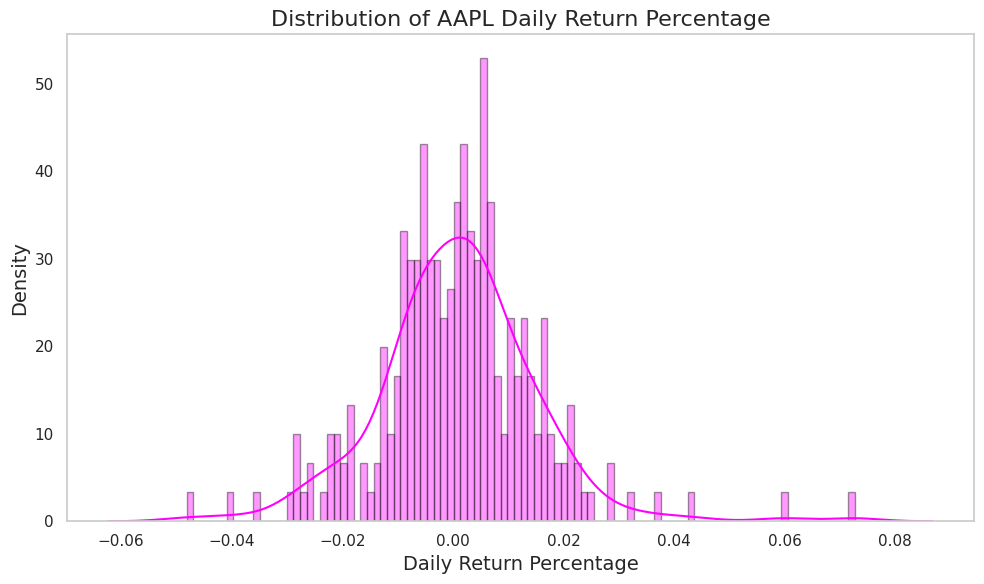

In [73]:
# Plotting the distribution plot of daily return percentage
plt.figure(figsize=(10, 6))  # Adjusting figure size for better clarity
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta', hist_kws={'edgecolor': 'black'})  # Adjusting color and edgecolor
plt.title('Distribution of AAPL Daily Return Percentage', fontsize=16)  # Increase title font size
plt.xlabel('Daily Return Percentage', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Density', fontsize=14)  # Increase y-axis label font size
plt.grid(False)  # Turning off grid lines for better clarity
plt.tight_layout()
plt.show()


Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [74]:
import yfinance as yf
import pandas as pd
from datetime import datetime
# List of Tech_stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Grabbing closing prices for the tech stock list into one DataFrame using yfinance
closingprice_df = yf.download(tech_list, start=start, end=end)['Close']


[*********************100%***********************]  4 of 4 completed


In [75]:
closingprice_df.head(10)

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-11-27 00:00:00+00:00,189.789993,147.729996,136.410004,378.609985
2023-11-28 00:00:00+00:00,190.399994,147.029999,137.199997,382.700012
2023-11-29 00:00:00+00:00,189.369995,146.320007,134.990005,378.850006
2023-11-30 00:00:00+00:00,189.949997,146.089996,132.529999,378.910004
2023-12-01 00:00:00+00:00,191.240005,147.029999,131.860001,374.510010
2023-12-04 00:00:00+00:00,189.429993,144.839996,129.270004,369.140015
2023-12-05 00:00:00+00:00,193.419998,146.880005,130.990005,372.519989
2023-12-06 00:00:00+00:00,192.320007,144.520004,130.020004,368.799988
2023-12-07 00:00:00+00:00,194.270004,146.880005,136.929993,370.950012


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [76]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [77]:
tech_returns.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-11-27 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-11-28 00:00:00+00:00,0.003214,-0.004738,0.005791,0.010803
2023-11-29 00:00:00+00:00,-0.005410,-0.004829,-0.016108,-0.010060
2023-11-30 00:00:00+00:00,0.003063,-0.001572,-0.018224,0.000158
2023-12-01 00:00:00+00:00,0.006791,0.006434,-0.005055,-0.011612


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

##### GOOGL is a Alphabet Inc Class A Stock.

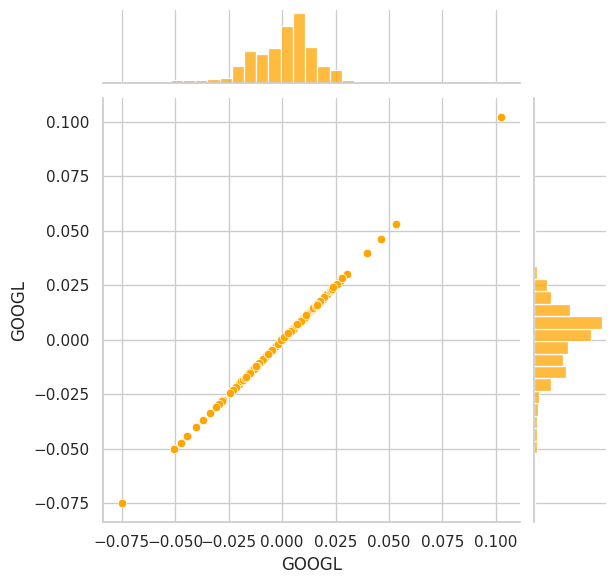

In [78]:
import seaborn as sns

# Comparing 'GOOGL' to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='orange')


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

So let's go ahead and compare Google and Amazon the same way.

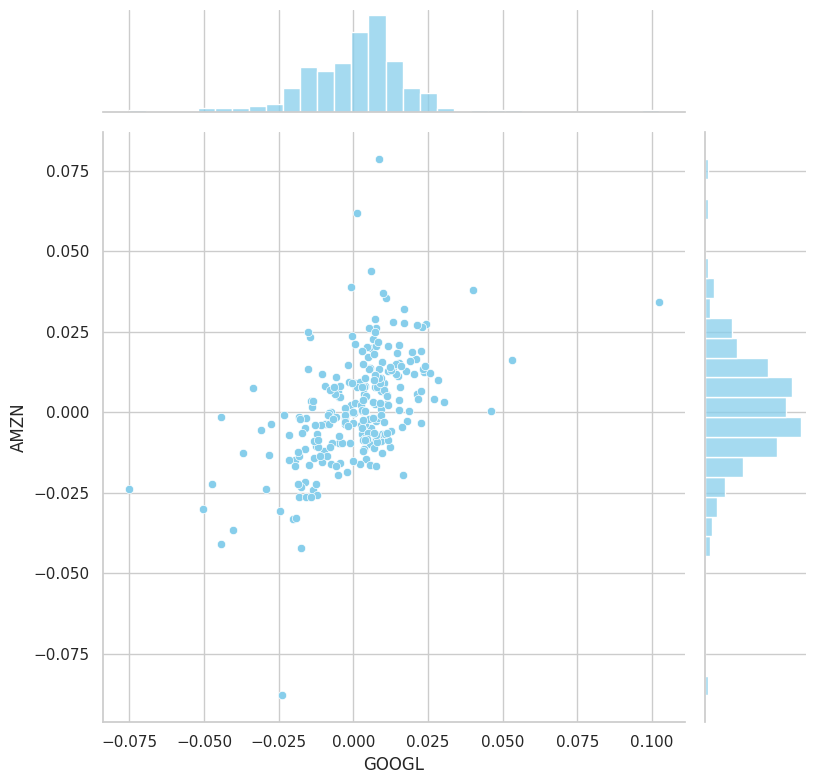

In [79]:
# Comparing the daily returns of Google and Amazon using jointplot
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='scatter', height=8, color='skyblue')


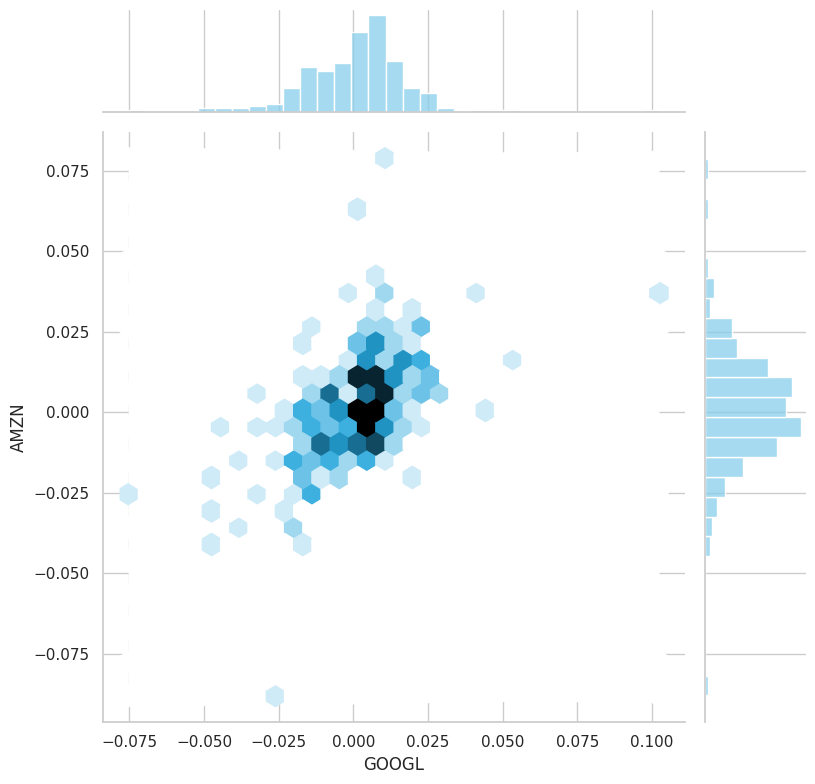

In [80]:
# with Hex plot
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='hex', height=8, color='skyblue')
# Pass 'GOOGL' and 'AMZN' as keyword arguments for x and y
# Pass tech_returns as the data keyword argument
# Changed size to height for consistency with Seaborn documentation

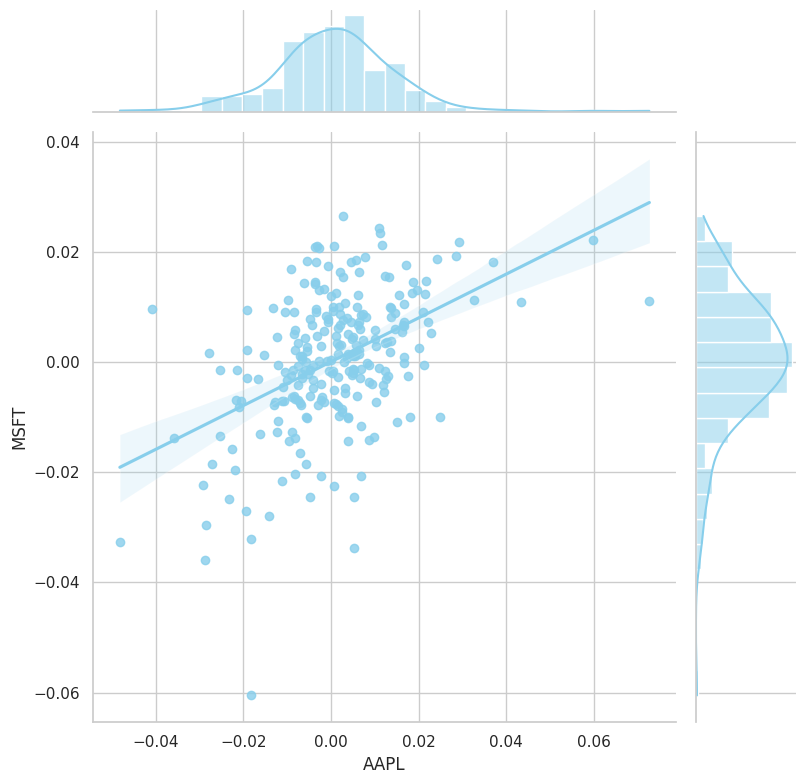

In [81]:
# Checking the relationship between the daily returns of Apple and Microsoft with a regression jointplot
sns.jointplot(x='AAPL', y='MSFT', data=tech_returns, kind='reg', height=8, color='skyblue')


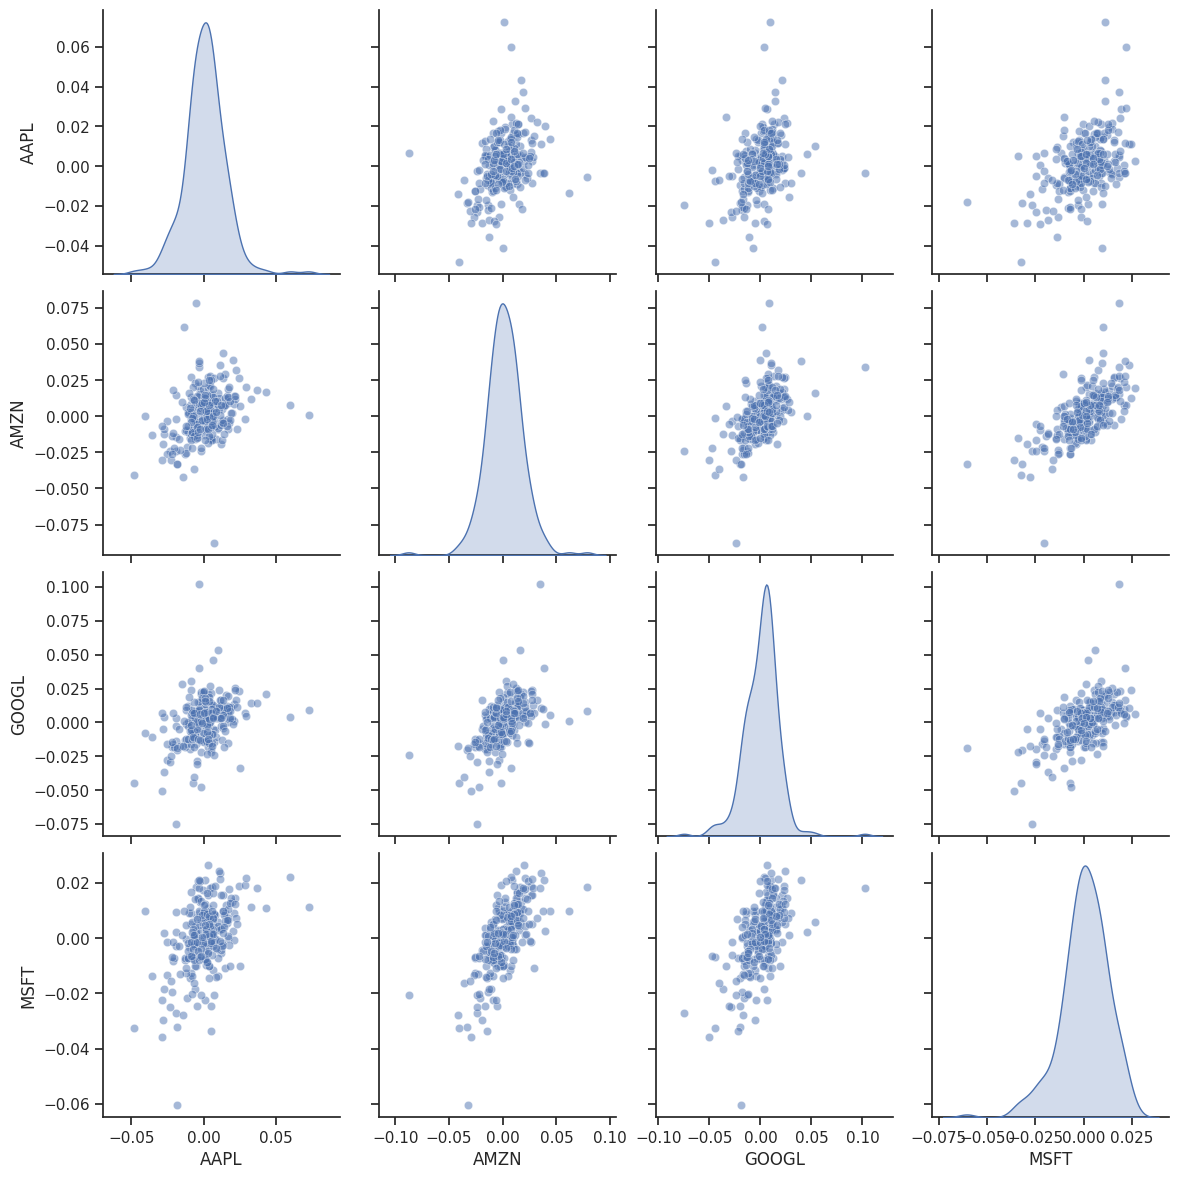

In [82]:
# Set style
sns.set(style="ticks")
# Customize pairplot
sns.pairplot(tech_returns.dropna(), height=3, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
# Show the plot
plt.show()

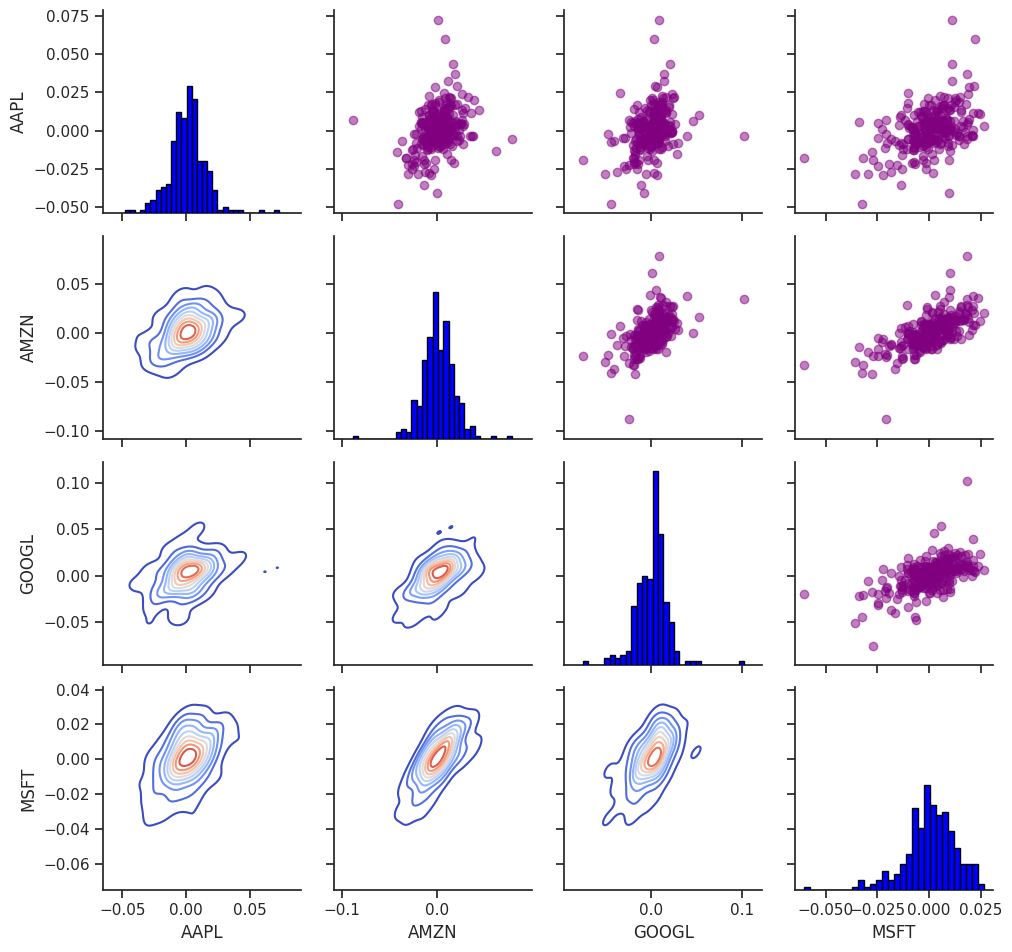

In [83]:
# Set up the figure by naming it returns_fig and calling PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper, specify what the upper triangle will look like (scatter plot with purple color)
returns_fig.map_upper(plt.scatter, color='purple', alpha=0.5)  # Adjust alpha for transparency

# Define the lower triangle in the figure, including the plot type (kde) and the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='coolwarm')  # You can change cmap to any colormap you prefer

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30, color='blue', edgecolor='black')  # Adjust edgecolor for histogram bars

# Adjust layout for better visualization
plt.subplots_adjust(top=0.95)  # Adjust top margin

# Show the plot
plt.show()


We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

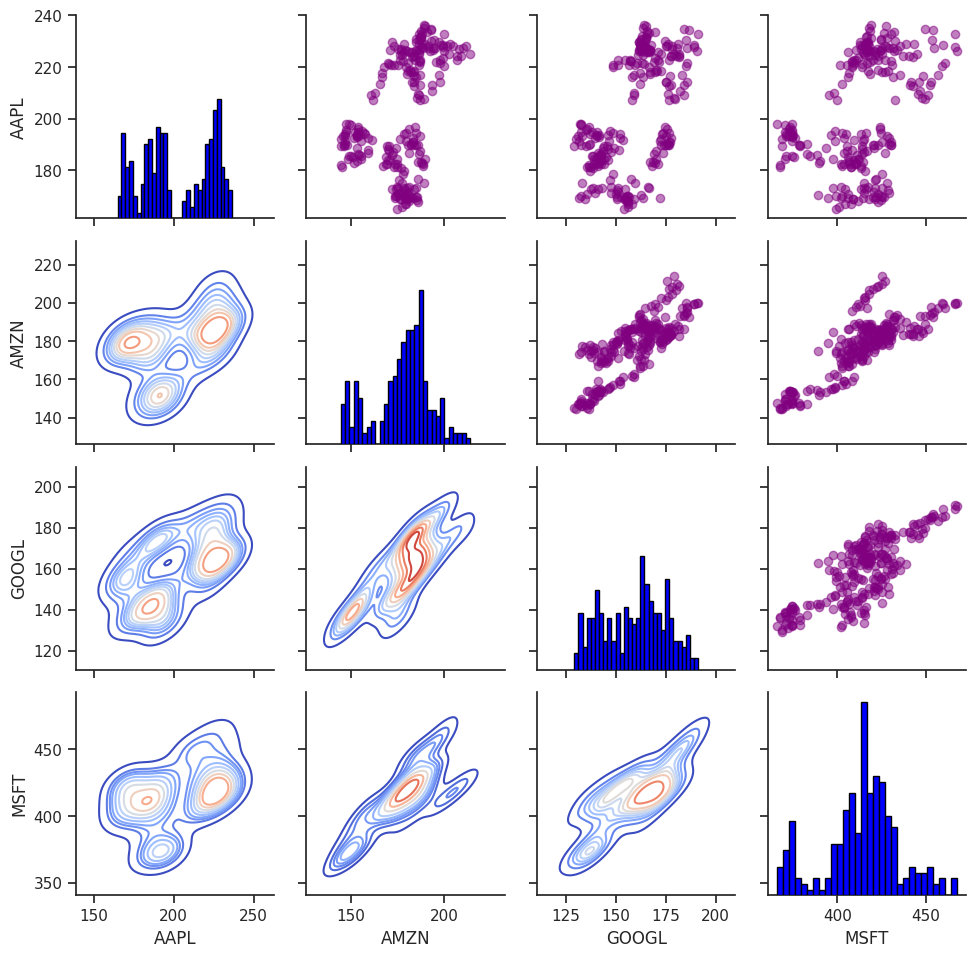

In [84]:
# Set up the figure by naming it returns_fig and calling PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper, specify what the upper triangle will look like (scatter plot with purple color)
returns_fig.map_upper(plt.scatter, color='purple', alpha=0.5)  # Adjust alpha for transparency

# Define the lower triangle in the figure, including the plot type (kde) and the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='coolwarm')  # You can change cmap to any colormap you prefer

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30, color='blue', edgecolor='black')  # Adjust edgecolor for histogram bars

# Adjust layout for better visualization
returns_fig.fig.subplots_adjust(top=0.95)  # Adjust top margin

# Show the plot
plt.show()


Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

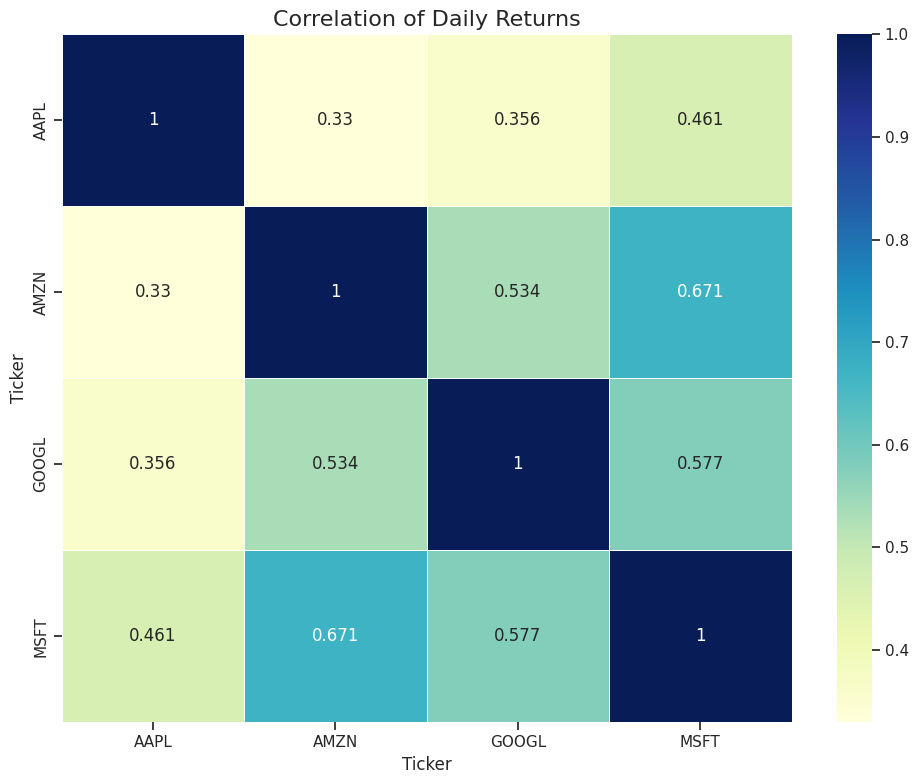

In [85]:
# Create the heatmap for the correlation of daily returns of the stocks
plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
sns.heatmap(tech_returns.corr(), annot=True, fmt=".3g", cmap='YlGnBu', linewidths=.5)

# Set title and adjust layout
plt.title('Correlation of Daily Returns', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


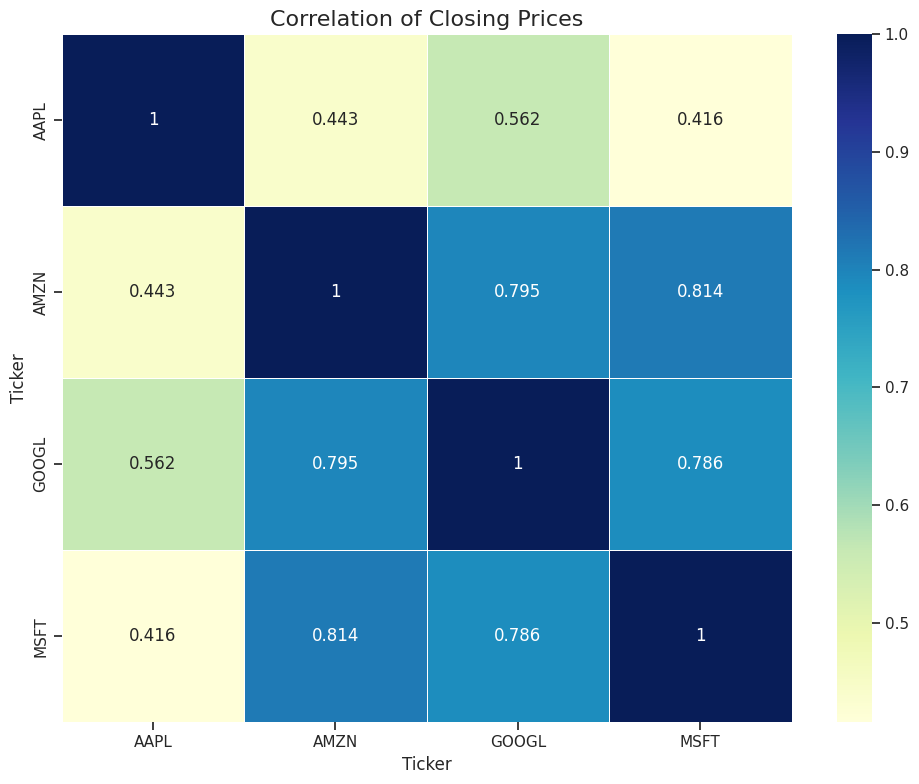

In [86]:
# Create the heatmap for the correlation of closing prices of the stocks
plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
sns.heatmap(closingprice_df.corr(), annot=True, fmt=".3g", cmap='YlGnBu', linewidths=.5)

# Set title and adjust layout
plt.title('Correlation of Closing Prices', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [87]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [88]:
rets.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-11-28 00:00:00+00:00,0.003214,-0.004738,0.005791,0.010803
2023-11-29 00:00:00+00:00,-0.005410,-0.004829,-0.016108,-0.010060
2023-11-30 00:00:00+00:00,0.003063,-0.001572,-0.018224,0.000158
2023-12-01 00:00:00+00:00,0.006791,0.006434,-0.005055,-0.011612
2023-12-04 00:00:00+00:00,-0.009465,-0.014895,-0.019642,-0.014339


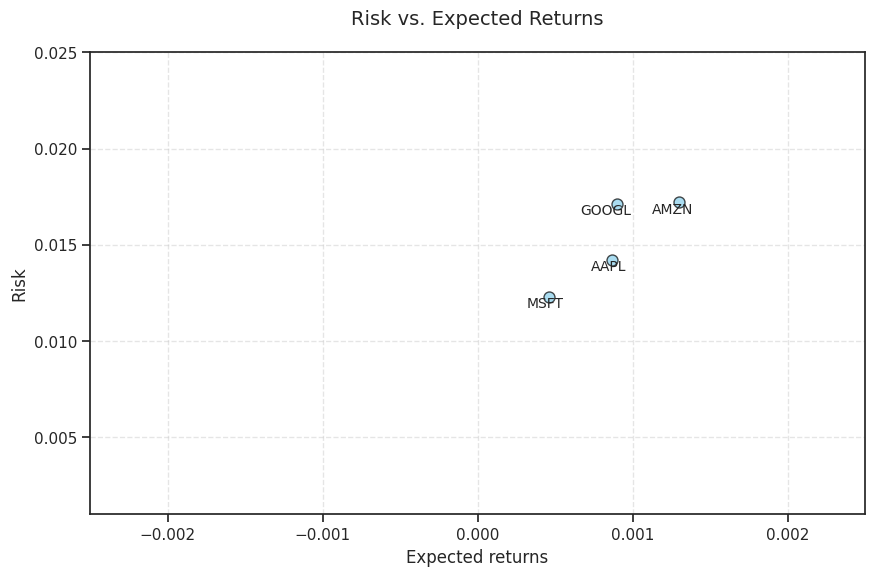

In [89]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi * 20

plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization

# Plot the scatter plot
plt.scatter(rets.mean(), rets.std(), s=area, color='skyblue', edgecolors='black', alpha=0.7)

# Set the x and y limits of the plot
plt.xlim([-0.0025, 0.0025])
plt.ylim([0.001, 0.025])

# Set the plot axis titles
plt.xlabel('Expected returns', fontsize=12)
plt.ylabel('Risk', fontsize=12)

# Label the scatter plots with stock names
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(10, -10),
        textcoords='offset points', ha='right', va='bottom',
        fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add title and adjust layout
plt.title('Risk vs. Expected Returns', fontsize=14, pad=20)

# Show the plot
plt.show()


By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

<ipython-input-90-c9aec0310fb2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple', hist_kws=dict(edgecolor="k", linewidth=1))


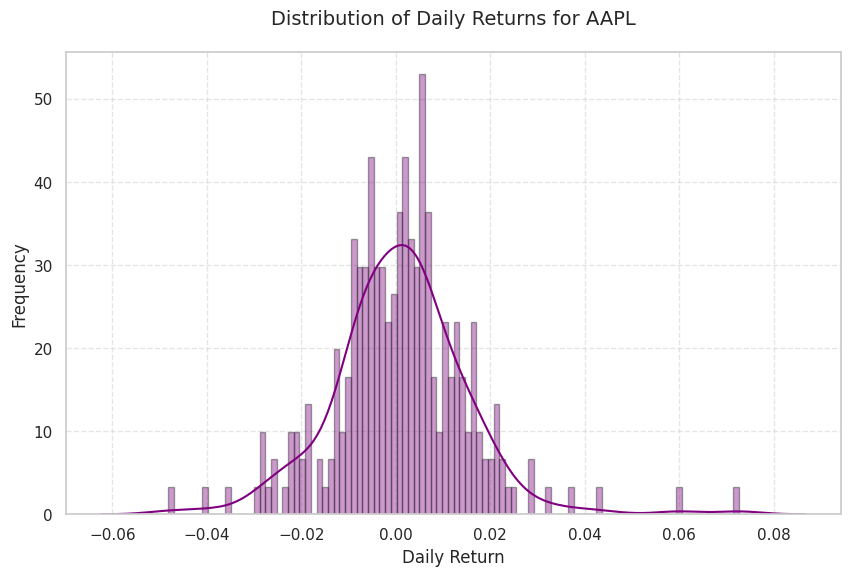

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set_style("whitegrid")

# Create the distribution plot with seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple', hist_kws=dict(edgecolor="k", linewidth=1))

# Set the plot axis labels
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add title
plt.title('Distribution of Daily Returns for AAPL', fontsize=14, pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Now we can use quantile to get the risk value for the stock.

In [91]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.021755283943546384

The 0.05 empirical quantile of daily returns is at -0.016. That means that with 95% confidence, our worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $16,000.

In [92]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.024077808175273857

In [93]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.024236920306520825

In [94]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.02197118114228111

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.


To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL


In [95]:
rets.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-11-28 00:00:00+00:00,0.003214,-0.004738,0.005791,0.010803
2023-11-29 00:00:00+00:00,-0.005410,-0.004829,-0.016108,-0.010060
2023-11-30 00:00:00+00:00,0.003063,-0.001572,-0.018224,0.000158
2023-12-01 00:00:00+00:00,0.006791,0.006434,-0.005055,-0.011612
2023-12-04 00:00:00+00:00,-0.009465,-0.014895,-0.019642,-0.014339


In [96]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [97]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''

    # Define a price array
    price = np.zeros(days)
    price[0] = start_price

    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    # Run price array for number of days
    for x in range(1,days):

        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

Awesome! Now lets put above function to work.

In [98]:
# For Google Stock - GOOGL
GOOGL.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2023-11-27 00:00:00+00:00,136.073074,136.410004,138.419998,136.000000,136.029999,23436500
2023-11-28 00:00:00+00:00,136.861099,137.199997,137.250000,135.419998,136.080002,18730000
2023-11-29 00:00:00+00:00,134.656570,134.990005,138.289993,134.839996,137.570007,23967200
2023-11-30 00:00:00+00:00,132.202637,132.529999,135.550003,131.279999,135.050003,38988300
2023-12-01 00:00:00+00:00,131.534302,131.860001,132.110001,130.669998,131.860001,31431200


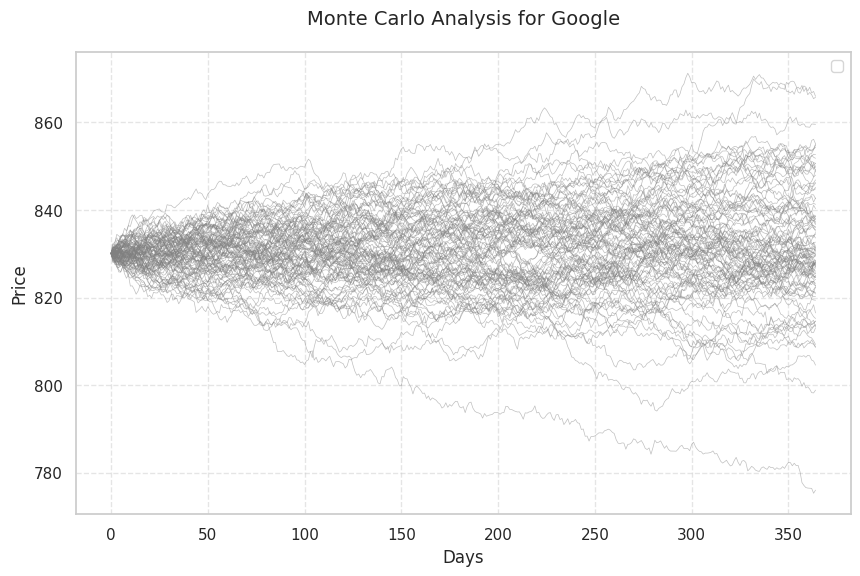

In [99]:
# Define the starting price
start_price = 830.09

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), linewidth=0.5, alpha=0.5, color='gray')



# Set plot labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Google', fontsize=14, pad=20)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


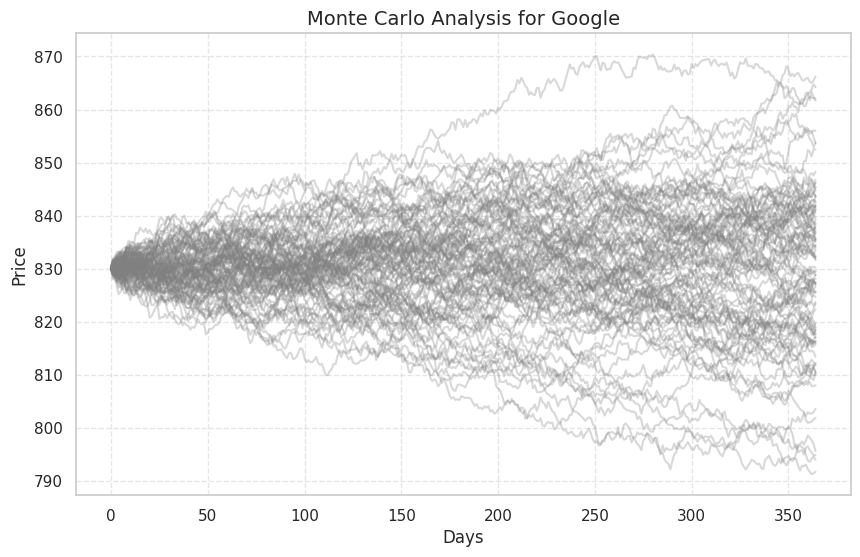

In [100]:
# Define the starting price
start_price = 830.09

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), color='gray', alpha=0.3)  # Set lower opacity for better distinction

# Add labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Google', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [101]:
# For Amazon Stock - AMZN
AMZN.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2023-11-27 00:00:00+00:00,147.729996,147.729996,149.259995,146.880005,147.529999,53762400
2023-11-28 00:00:00+00:00,147.029999,147.029999,147.600006,145.529999,146.979996,42711700
2023-11-29 00:00:00+00:00,146.320007,146.320007,148.539993,145.970001,147.850006,40610900
2023-11-30 00:00:00+00:00,146.089996,146.089996,146.929993,144.330002,144.759995,65814000
2023-12-01 00:00:00+00:00,147.029999,147.029999,147.250000,145.550003,146.000000,39924600


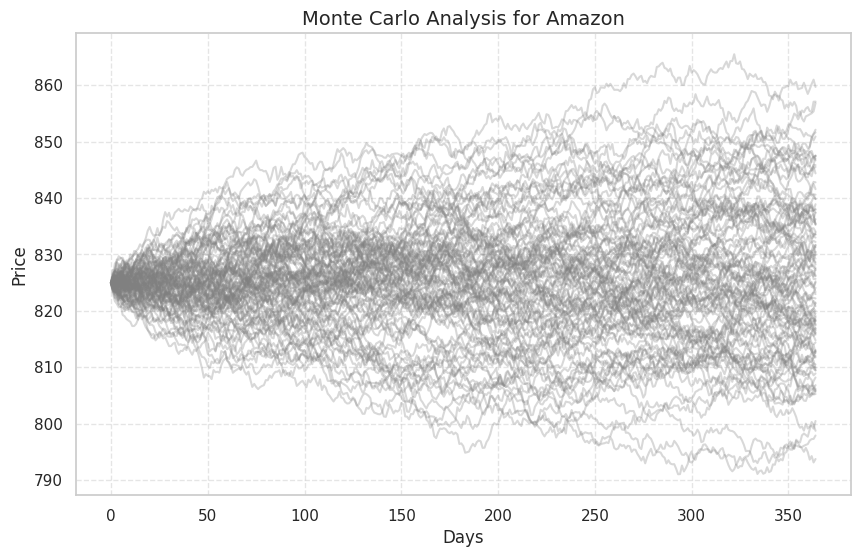

In [102]:
# Define the starting price
start_price = 824.95

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), color='gray', alpha=0.3)  # Set lower opacity for better distinction

# Add labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Amazon', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [103]:
# For Apple Stock - AAPL
AAPL.head()

Price,Adj Close,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,,
2023-11-27 00:00:00+00:00,188.864731,189.789993,190.669998,188.899994,189.919998,40552600,NaN,NaN,NaN,NaN,NaN
2023-11-28 00:00:00+00:00,189.471756,190.399994,191.080002,189.399994,189.779999,38415400,NaN,NaN,NaN,NaN,0.003214
2023-11-29 00:00:00+00:00,188.446793,189.369995,192.089996,188.970001,190.899994,43014200,NaN,NaN,NaN,NaN,-0.005410
2023-11-30 00:00:00+00:00,189.023956,189.949997,190.320007,188.190002,189.839996,48794400,NaN,NaN,NaN,NaN,0.003063
2023-12-01 00:00:00+00:00,190.307693,191.240005,191.559998,189.229996,190.330002,45679300,NaN,NaN,NaN,NaN,0.006791


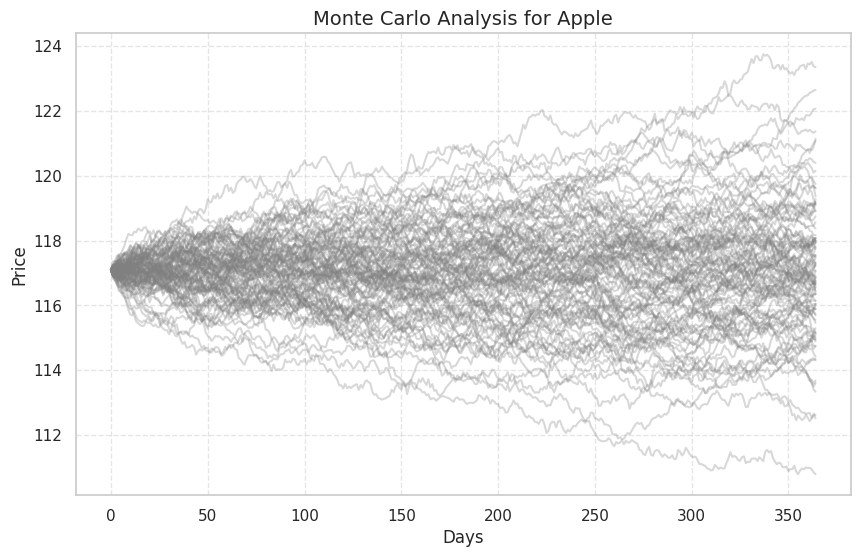

In [104]:
# Define the starting price
start_price = 117.10

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), color='gray', alpha=0.3)  # Set lower opacity for better distinction

# Add labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Apple', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [105]:
# For Microsoft Stock - MSFT
MSFT.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2023-11-27 00:00:00+00:00,375.799805,378.609985,380.640015,376.200012,376.779999,22179200
2023-11-28 00:00:00+00:00,379.859467,382.700012,383.000000,378.160004,378.350006,20453100
2023-11-29 00:00:00+00:00,376.038025,378.850006,384.299988,377.440002,383.760010,28963400
2023-11-30 00:00:00+00:00,376.097595,378.910004,380.089996,375.470001,378.489990,30554400
2023-12-01 00:00:00+00:00,371.730255,374.510010,378.160004,371.309998,376.760010,33020400


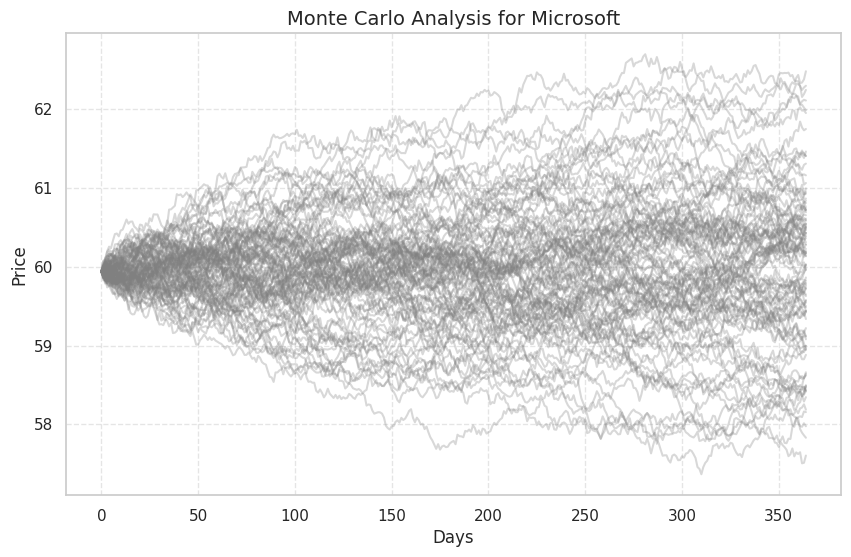

In [106]:
# Define the starting price
start_price = 59.94

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), color='gray', alpha=0.3)  # Set lower opacity for better distinction

# Add labels and title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Monte Carlo Analysis for Microsoft', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [107]:
# Lets start with Google stock price
start_price = 830.09

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

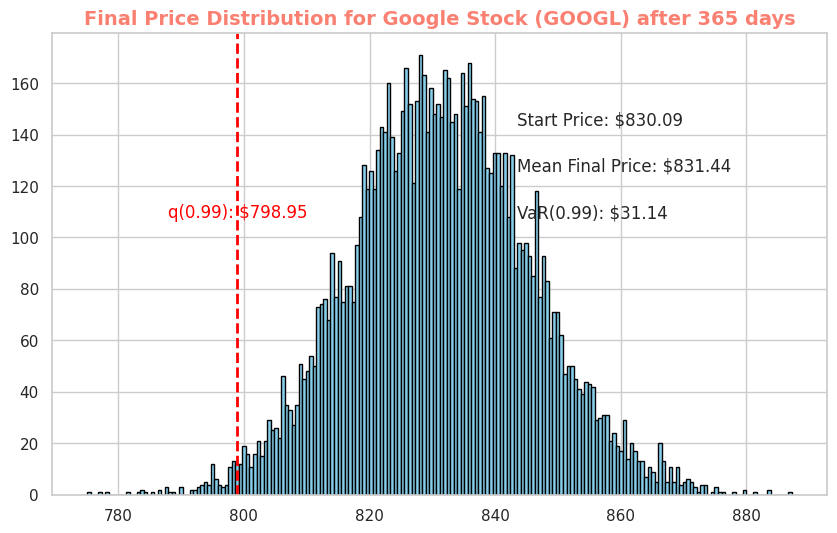

In [108]:
# Define the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(simulations, bins=200, color='skyblue', edgecolor='black')  # Customize histogram color and edgecolor

# Additional information on the plot using plt.text
plt.text(0.6, 0.8, f'Start Price: ${start_price:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.7, f'Mean Final Price: ${simulations.mean():.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.6, f'VaR(0.99): ${start_price - q:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.15, 0.6, f'q(0.99): ${q:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')  # Adjust text position, format, and color

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='red', linestyle='--')  # Customize line properties

# Add title
plt.title(f'Final Price Distribution for Google Stock (GOOGL) after {days} days', fontsize=14, fontweight='bold', color='salmon')

# Show plot
plt.show()


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $31.14 for every investment of
830.09 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $31.14 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [109]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

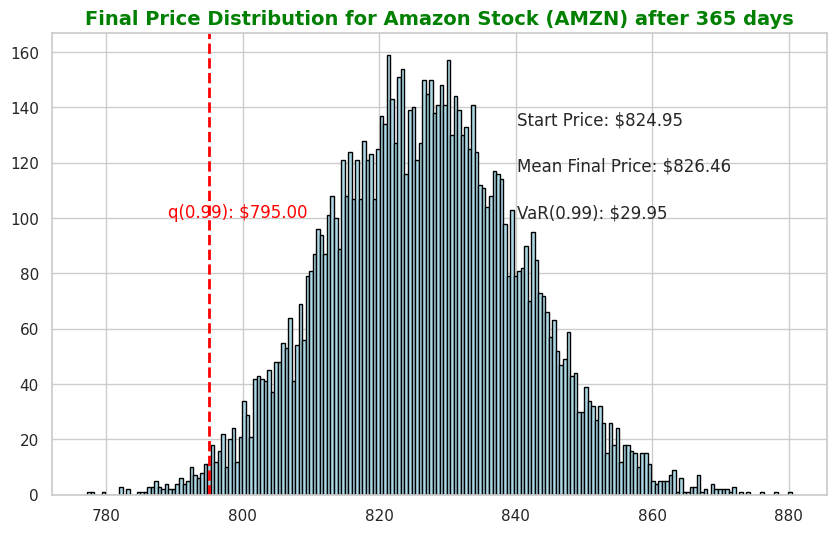

In [110]:
# Define the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(simulations, bins=200, color='lightblue', edgecolor='black')  # Customize histogram color and edgecolor

# Additional information on the plot using plt.text
plt.text(0.6, 0.8, f'Start Price: ${start_price:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.7, f'Mean Final Price: ${simulations.mean():.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.6, f'VaR(0.99): ${start_price - q:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.15, 0.6, f'q(0.99): ${q:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')  # Adjust text position, format, and color

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='red', linestyle='--')  # Customize line properties

# Add title
plt.title(f'Final Price Distribution for Amazon Stock (AMZN) after {days} days', fontsize=14, fontweight='bold', color='green')

# Show plot
plt.show()


This basically means for every initial AMZN stock you purchase you're putting about $29.95 at risk 99% of the time from our Monte Carlo Simulation.

In [111]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

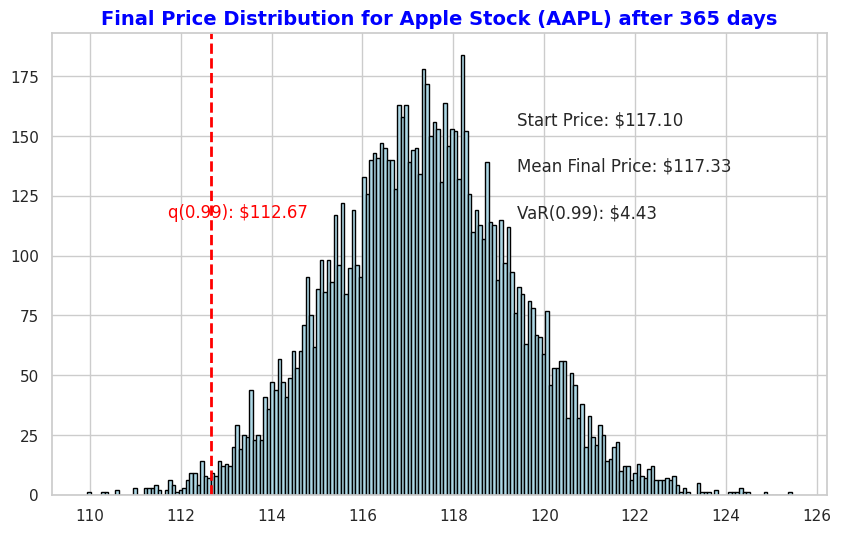

In [112]:
# Define the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(simulations, bins=200, color='lightblue', edgecolor='black')  # Customize histogram color and edgecolor

# Additional information on the plot using plt.text
plt.text(0.6, 0.8, f'Start Price: ${start_price:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.7, f'Mean Final Price: ${simulations.mean():.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.6, f'VaR(0.99): ${start_price - q:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.15, 0.6, f'q(0.99): ${q:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')  # Adjust text position, format, and color

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='red', linestyle='--')  # Customize line properties

# Add title
plt.title(f'Final Price Distribution for Apple Stock (AAPL) after {days} days', fontsize=14, fontweight='bold', color='blue')

# Show plot
plt.show()


Great! This basically means for every initial AAPL stock you purchase you're putting about $4.43 at risk 99% of the time from our Monte Carlo Simulation.

In [113]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

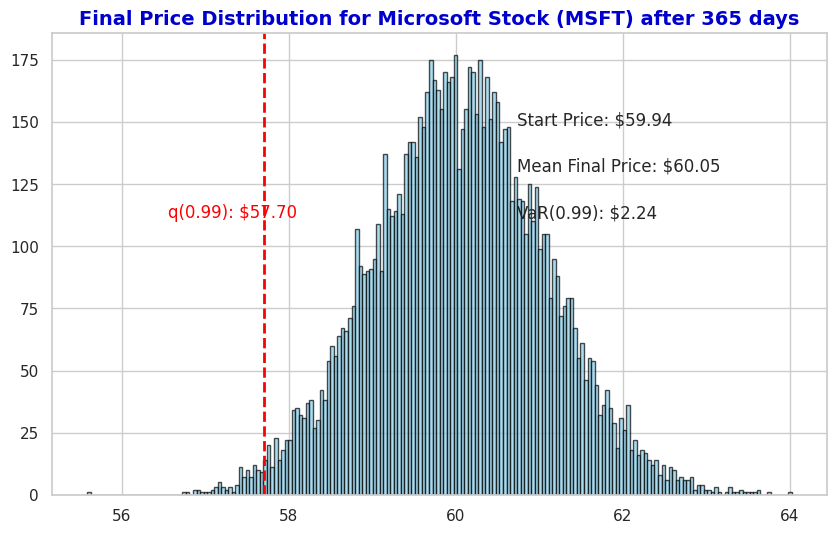

In [114]:
# Define the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices with customized histogram properties
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(simulations, bins=200, color='skyblue', edgecolor='black', alpha=0.7)  # Customize histogram color, edgecolor, and transparency

# Additional information on the plot using plt.text for better layout and positioning
plt.text(0.6, 0.8, f'Start Price: ${start_price:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.7, f'Mean Final Price: ${simulations.mean():.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.6, 0.6, f'VaR(0.99): ${start_price - q:.2f}', transform=plt.gca().transAxes, fontsize=12)  # Adjust text position and format
plt.text(0.15, 0.6, f'q(0.99): ${q:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')  # Adjust text position, format, and color

# Plot a vertical line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='red', linestyle='--')  # Customize line properties for the quantile

# Add a title with bold font style and adjusted color
plt.title(f'Final Price Distribution for Microsoft Stock (MSFT) after {days} days', fontsize=14, fontweight='bold', color='mediumblue')

# Show the plot
plt.show()


Nice, This basically means for every initial MSFT stock you purchase you're putting about $2.24 at risk 99% of the time from our Monte Carlo Simulation.